In [1]:
print("vision")

vision


In [2]:
import tensorflow as tf #pip install tensorflow
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2 #pip install opencv-python

In [3]:
readimg = cv2.imread('archive/train/angry/Training_3908.jpg')

In [4]:
readimg.shape

(48, 48, 3)

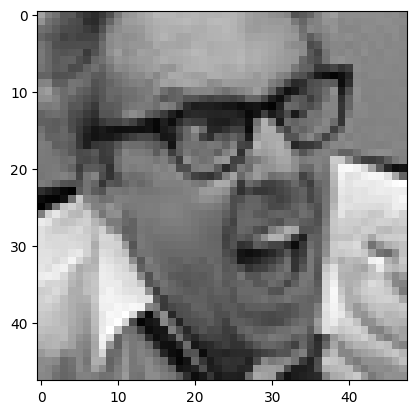

In [5]:
plt.imshow(readimg)

In [6]:
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [7]:
trainpath = 'archive/train/'

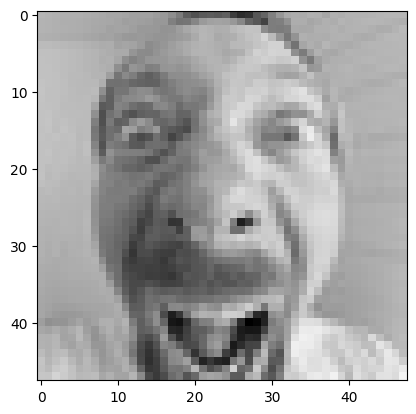

In [8]:
for i in classes:
    path = os.path.join(trainpath, i)
    for j in os.listdir(path):
        readimg = cv2.imread(os.path.join(path, j))
        plt.imshow(cv2.cvtColor(readimg, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

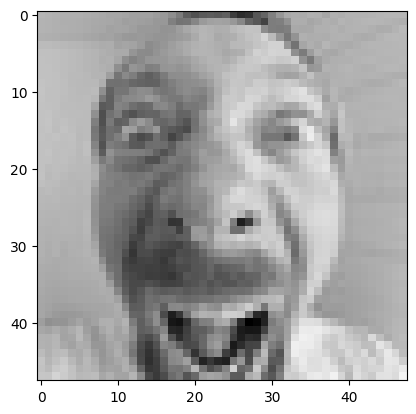

In [9]:
#resize the image to 224 x 224
new_array = cv2.resize(readimg, (224, 224))
plt.imshow(cv2.cvtColor(readimg, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
new_array.shape

(224, 224, 3)

In [11]:
#read all imgs and convert to array

In [12]:
training_data = []

def create_train_data():
    for i in classes:
        path = os.path.join(trainpath, i)
        class_num = classes.index(i)
        for j in os.listdir(path):
            try:
                readimg = cv2.imread(os.path.join(path, j))
                new_array = cv2.resize(readimg, (224, 224))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [13]:
create_train_data()

In [14]:
print(len(training_data))


11818


In [15]:
import random
random.shuffle(training_data)

In [16]:
x = [] #features
y = [] #lable

for f,l in training_data:
    x.append(f)
    y.append(l)
x = np.array(x).reshape(-1,224, 224, 3)

In [17]:
x.shape

(11818, 224, 224, 3)

In [18]:
x = x/255 #normlise (max number is 255)

In [19]:
y[21]

6

In [20]:
y = np.array(y)

In [21]:
y.shape

(11818,)

In [22]:
#start with the deep learning model

In [23]:
from tensorflow import keras
from keras import layers

In [24]:
model = tf.keras.applications.MobileNetV2()

In [25]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [26]:
base_input = model.layers[0].input

In [27]:
base_output= model.layers[-2].output

In [28]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [29]:
final_layer = layers.Dense(128)(base_output)
final_layer = layers.Activation('relu')(final_layer)
final_layer = layers.Dense(64)(final_layer)
final_layer = layers.Activation('relu')(final_layer)
final_layer = layers.Dense(7, activation='softmax')(final_layer) 

In [30]:
final_layer

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [31]:
vision_model = keras.Model(inputs = base_input, outputs = final_layer)

In [32]:
vision_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [33]:
vision_model.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam', metrics = ["accuracy"])

In [34]:
vision_model.fit(x,y,epochs = 50)

Epoch 1/50
370/370 [==============================] - 919s 2s/step - loss: 1.4793 - accuracy: 0.4334
Epoch 2/50
370/370 [==============================] - 913s 2s/step - loss: 1.2478 - accuracy: 0.5342
Epoch 3/50
370/370 [==============================] - 90619s 246s/step - loss: 1.1517 - accuracy: 0.5669
Epoch 4/50
370/370 [==============================] - 985s 3s/step - loss: 1.0655 - accuracy: 0.5997
Epoch 5/50
370/370 [==============================] - 1018s 3s/step - loss: 0.9930 - accuracy: 0.6295
Epoch 6/50
370/370 [==============================] - 929s 3s/step - loss: 0.9225 - accuracy: 0.6566
Epoch 7/50
370/370 [==============================] - 1114s 3s/step - loss: 0.8543 - accuracy: 0.6876
Epoch 8/50
370/370 [==============================] - 1302s 4s/step - loss: 0.7831 - accuracy: 0.7117
Epoch 9/50
370/370 [==============================] - 1052s 3s/step - loss: 0.7186 - accuracy: 0.7325
Epoch 10/50
370/370 [==============================] - 68784s 186s/step - loss: 0.6

In [35]:
vision_model.save("saved_training_50epo.h5")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
vision_model.save("saved_training_15epo.h5")

In [35]:
vision_model.fit(x,y,epochs = 20)

Epoch 1/20
370/370 [==============================] - 455s 1s/step - loss: 1.4635 - accuracy: 0.4354
Epoch 2/20
370/370 [==============================] - 465s 1s/step - loss: 1.2615 - accuracy: 0.5217
Epoch 3/20
370/370 [==============================] - 488s 1s/step - loss: 1.1489 - accuracy: 0.5652
Epoch 4/20
370/370 [==============================] - 464s 1s/step - loss: 1.0636 - accuracy: 0.6018
Epoch 5/20
370/370 [==============================] - 453s 1s/step - loss: 0.9998 - accuracy: 0.6274
Epoch 6/20
370/370 [==============================] - 454s 1s/step - loss: 0.9350 - accuracy: 0.6527
Epoch 7/20
370/370 [==============================] - 455s 1s/step - loss: 0.8691 - accuracy: 0.6763
Epoch 8/20
370/370 [==============================] - 1967s 5s/step - loss: 0.7970 - accuracy: 0.7048
Epoch 9/20
370/370 [==============================] - 912s 2s/step - loss: 0.7448 - accuracy: 0.7248
Epoch 10/20
370/370 [==============================] - 444s 1s/step - loss: 0.6777 - accur

In [36]:
vision_model.save("saved_training_20epo.h5")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
vision_model.fit(x,y,epochs = 30)

Epoch 1/30
370/370 [==============================] - 318s 853ms/step - loss: 1.5130 - accuracy: 0.4233
Epoch 2/30
370/370 [==============================] - 323s 872ms/step - loss: 1.2444 - accuracy: 0.5322
Epoch 3/30
370/370 [==============================] - 446s 1s/step - loss: 1.1048 - accuracy: 0.5929
Epoch 4/30
370/370 [==============================] - 361s 975ms/step - loss: 0.9853 - accuracy: 0.6381
Epoch 5/30
370/370 [==============================] - 426s 1s/step - loss: 0.8963 - accuracy: 0.6736
Epoch 6/30
370/370 [==============================] - 423s 1s/step - loss: 0.7886 - accuracy: 0.7174
Epoch 7/30
370/370 [==============================] - 440s 1s/step - loss: 0.6776 - accuracy: 0.7577
Epoch 8/30
370/370 [==============================] - 437s 1s/step - loss: 0.5944 - accuracy: 0.7900
Epoch 9/30
370/370 [==============================] - 432s 1s/step - loss: 0.4953 - accuracy: 0.8246
Epoch 10/30
370/370 [==============================] - 411s 1s/step - loss: 0.4548

In [35]:
vision_model.save("saved_training_30epo_v3.h5")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
